<h2><center>Food Image Classification</center></h2>

1. Importing Packages
2. Imprting the dataset from training directory
3. Data processing
4. Modelling
    - 4.1 CNN 2-Layered
    - 4.2 CNN 2-Layered Augmented
    - 4.3 CNN 5-Layered 
    - 4.4 CNN 5-Layered Augmented
    - 4.5 CNN 6-Layered Augmented
5. EfficientNet v2
6. Model Comparison

### 1. Importing packages <a id=1></a>

In [1]:
#pip install opencv-python

In [2]:
# import data processing and visualisation libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# import image processing libraries
import cv2
import skimage
from skimage.transform import resize

# import tensorflow and keras
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dense, Flatten
from keras.preprocessing import image
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
print("Packages imported...")


Packages imported...


### 2. Importing the dataset from training directory <a id=2></a>

In [3]:
test_data_original = tf.keras.preprocessing.image_dataset_from_directory('/kaggle/input/food11/food11/test', 
                                                                 label_mode = "categorical",
                                                                 image_size = (128, 128) ,
                                                                 seed = 42)

Found 1100 files belonging to 11 classes.


In [4]:
train_data_original = tf.keras.preprocessing.image_dataset_from_directory('/kaggle/input/food11/food11/train', 
                                                                 label_mode = "categorical",
                                                                 image_size = (128, 128) ,
                                                                 seed = 42)

Found 9900 files belonging to 11 classes.


### 3. Data processing <a id=6></a>

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data_augmented = train_datagen.flow_from_directory('/kaggle/input/food11/food11/train', target_size=(128,128), batch_size=32, class_mode='categorical')
test_data_augmented = test_datagen.flow_from_directory('/kaggle/input/food11/food11/test', target_size=(128,128), batch_size=32, class_mode='categorical')

Found 9900 images belonging to 11 classes.
Found 1100 images belonging to 11 classes.


### 4. Modeling <a id=11></a>

#### 4.1 CNN 2 Layered <a id=13></a>

In [6]:
# Define the model
cnn_2 = Sequential()
cnn_2.add(Conv2D(16, (3, 3), input_shape=(128, 128, 3)))
cnn_2.add(Activation('relu'))
cnn_2.add(MaxPooling2D((2, 2)))
cnn_2.add(Flatten())
cnn_2.add(Dense(11, activation='softmax'))


cnn_2.summary()

cnn_2.compile(loss = "categorical_crossentropy",
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ["accuracy"])
history_cnn_2 = cnn_2.fit(train_data_original,
                    epochs=10,
                    validation_data=test_data_original)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 activation (Activation)     (None, 126, 126, 16)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 16)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 63504)             0         
                                                                 
 dense (Dense)               (None, 11)                698555    
                                                                 
Total params: 699,003
Trainable params: 699,003
Non-trainable params: 0
__________________________________________________

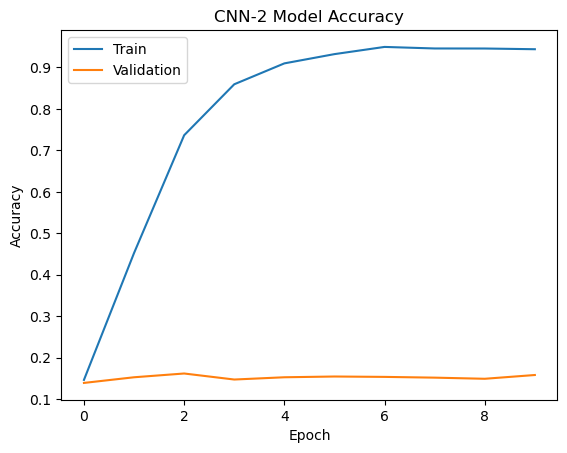

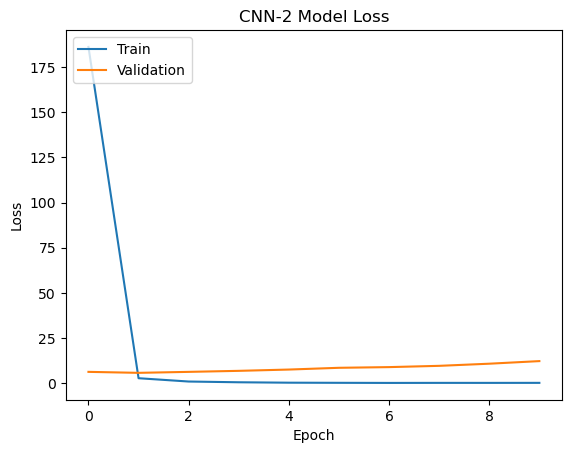

In [7]:
plt.plot(history_cnn_2.history['accuracy'])
plt.plot(history_cnn_2.history['val_accuracy'])
plt.title('CNN-2 Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# plot the training and validation loss over epochs
plt.plot(history_cnn_2.history['loss'])
plt.plot(history_cnn_2.history['val_loss'])
plt.title('CNN-2 Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#### 4.2 CNN 2 Layered Augmented 

In [9]:
# Define the model
cnn_2_a = Sequential()
cnn_2_a.add(Conv2D(16, (3, 3), input_shape=(128, 128, 3)))
cnn_2_a.add(Activation('relu'))
cnn_2_a.add(MaxPooling2D((2, 2)))
cnn_2_a.add(Flatten())
cnn_2_a.add(Dense(11, activation='softmax'))


cnn_2_a.summary()

cnn_2_a.compile(loss = "categorical_crossentropy",
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ["accuracy"])
history_cnn_2_a = cnn_2_a.fit(train_data_augmented,
                    epochs=10,
                    validation_data=test_data_augmented)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 126, 126, 16)      448       
                                                                 
 activation_2 (Activation)   (None, 126, 126, 16)      0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 63, 63, 16)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 63504)             0         
                                                                 
 dense_2 (Dense)             (None, 11)                698555    
                                                                 
Total params: 699,003
Trainable params: 699,003
Non-trainable params: 0
________________________________________________

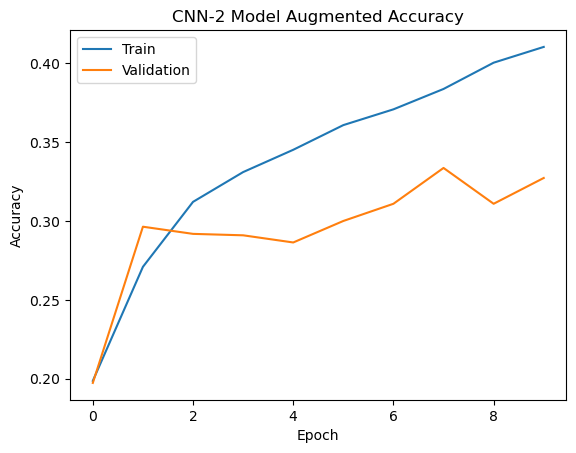

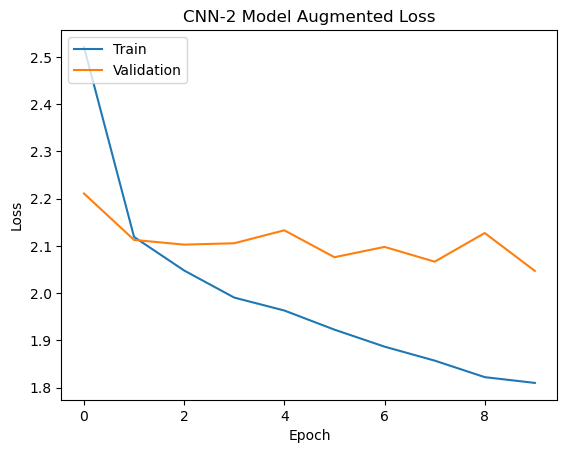

In [10]:
plt.plot(history_cnn_2_a.history['accuracy'])
plt.plot(history_cnn_2_a.history['val_accuracy'])
plt.title('CNN-2 Model Augmented Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# plot the training and validation loss over epochs
plt.plot(history_cnn_2_a.history['loss'])
plt.plot(history_cnn_2_a.history['val_loss'])
plt.title('CNN-2 Model Augmented Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#### 4.3 CNN 5  Layered 

In [11]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dense, Flatten


cnn5 = Sequential()
cnn5.add(Conv2D(32, (5, 5), input_shape=(128, 128, 3)))
cnn5.add(Activation('relu'))
cnn5.add(MaxPooling2D((2, 2)))

cnn5.add(Conv2D(64, (3, 3)))
cnn5.add(Activation('relu'))
cnn5.add(MaxPooling2D((2, 2)))

cnn5.add(Conv2D(64, (3, 3)))
cnn5.add(Activation('relu'))
cnn5.add(MaxPooling2D((2, 2)))

cnn5.add(Flatten())

cnn5.add(Dense(128, activation='relu'))

cnn5.add(Dense(11, activation='softmax'))
cnn5.summary()

cnn5.compile(loss = "categorical_crossentropy",
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ["accuracy"])


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 124, 124, 32)      2432      
                                                                 
 activation_3 (Activation)   (None, 124, 124, 32)      0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 activation_4 (Activation)   (None, 60, 60, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                  

In [12]:
history_cnn5 = cnn5.fit(train_data_original,
                    epochs=20,
                    validation_data=test_data_original)

Epoch 1/20
310/310 [==============================] - 20s 55ms/step - loss: 4.4861 - accuracy: 0.0951 - val_loss: 2.3992 - val_accuracy: 0.0900
Epoch 2/20
310/310 [==============================] - 18s 56ms/step - loss: 2.3791 - accuracy: 0.1116 - val_loss: 2.4350 - val_accuracy: 0.0891
Epoch 3/20
310/310 [==============================] - 18s 58ms/step - loss: 2.3549 - accuracy: 0.1268 - val_loss: 2.4521 - val_accuracy: 0.1064
Epoch 4/20
310/310 [==============================] - 17s 53ms/step - loss: 2.2961 - accuracy: 0.1502 - val_loss: 2.4923 - val_accuracy: 0.0991
Epoch 5/20
310/310 [==============================] - 17s 55ms/step - loss: 2.2015 - accuracy: 0.1909 - val_loss: 2.5814 - val_accuracy: 0.1045
Epoch 6/20
310/310 [==============================] - 18s 57ms/step - loss: 2.1187 - accuracy: 0.2312 - val_loss: 2.8638 - val_accuracy: 0.1218
Epoch 7/20
310/310 [==============================] - 18s 56ms/step - loss: 2.0593 - accuracy: 0.2523 - val_loss: 3.2395 - val_accuracy:

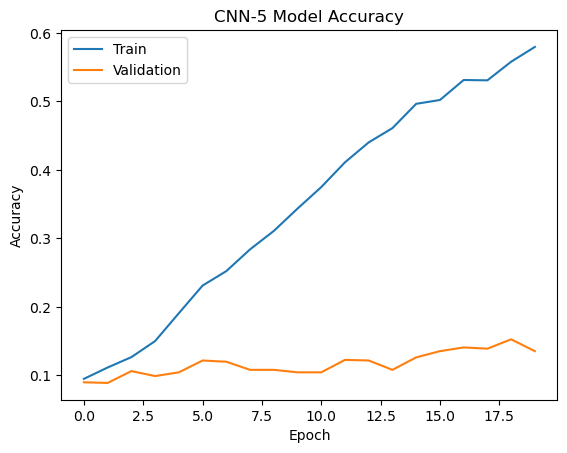

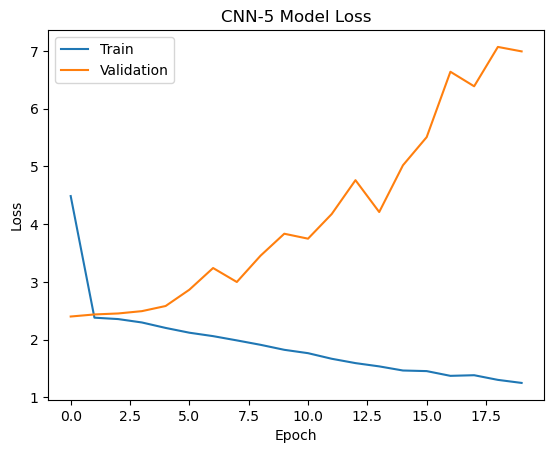

In [13]:
plt.plot(history_cnn5.history['accuracy'])
plt.plot(history_cnn5.history['val_accuracy'])
plt.title('CNN-5 Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# plot the training and validation loss over epochs
plt.plot(history_cnn5.history['loss'])
plt.plot(history_cnn5.history['val_loss'])
plt.title('CNN-5 Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#### 4.4 CNN 5 Layered Augmented 

In [15]:
cnn5_history_augmented = cnn5.fit(train_data_augmented,
          epochs=20,
          batch_size=64,
          verbose=2,
          validation_data=test_data_augmented)


Epoch 1/20
310/310 - 81s - loss: 2.5555 - accuracy: 0.1195 - val_loss: 2.3185 - val_accuracy: 0.1491 - 81s/epoch - 263ms/step
Epoch 2/20
310/310 - 79s - loss: 2.2723 - accuracy: 0.1718 - val_loss: 2.2741 - val_accuracy: 0.1836 - 79s/epoch - 256ms/step
Epoch 3/20
310/310 - 80s - loss: 2.2054 - accuracy: 0.2163 - val_loss: 2.2152 - val_accuracy: 0.2218 - 80s/epoch - 258ms/step
Epoch 4/20
310/310 - 80s - loss: 2.1299 - accuracy: 0.2603 - val_loss: 2.1311 - val_accuracy: 0.2664 - 80s/epoch - 257ms/step
Epoch 5/20
310/310 - 80s - loss: 2.0782 - accuracy: 0.2802 - val_loss: 2.1095 - val_accuracy: 0.2900 - 80s/epoch - 258ms/step
Epoch 6/20
310/310 - 80s - loss: 2.0369 - accuracy: 0.2997 - val_loss: 2.0773 - val_accuracy: 0.2882 - 80s/epoch - 257ms/step
Epoch 7/20
310/310 - 80s - loss: 1.9982 - accuracy: 0.3080 - val_loss: 2.0068 - val_accuracy: 0.3000 - 80s/epoch - 257ms/step
Epoch 8/20
310/310 - 80s - loss: 1.9375 - accuracy: 0.3376 - val_loss: 1.9695 - val_accuracy: 0.3273 - 80s/epoch - 256

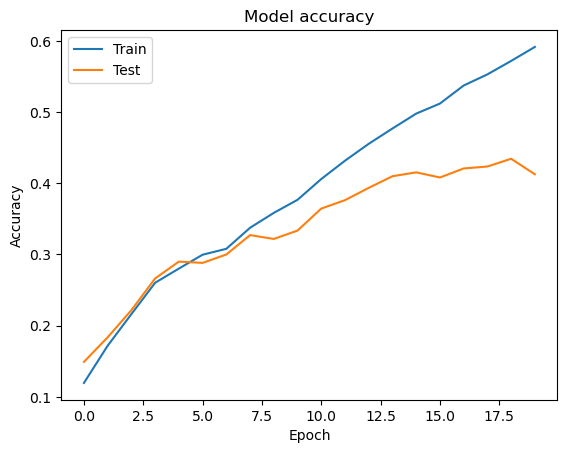

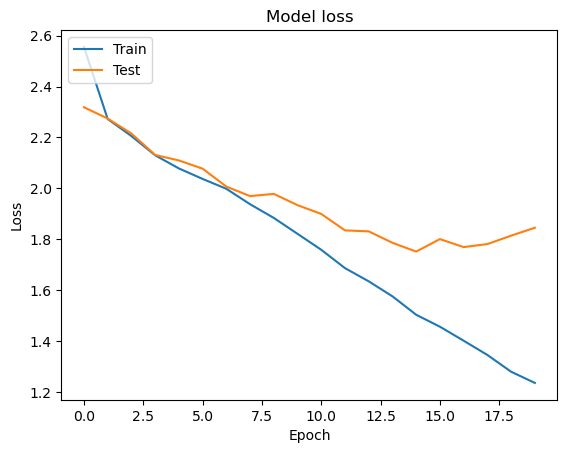

In [16]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(cnn5_history_augmented.history['accuracy'])
plt.plot(cnn5_history_augmented.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(cnn5_history_augmented.history['loss'])
plt.plot(cnn5_history_augmented.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

##### 4.5 CNN 6-Layered Augmented

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the path to the dataset
train_path = 'food11/train'
test_path = 'food11/test'

# Set the image size and batch size for training and testing
img_size = (224, 224)
batch_size = 32

# Create a data generator for training and testing
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(train_path, target_size=img_size, batch_size=batch_size, class_mode='categorical')
test_data = test_datagen.flow_from_directory(test_path, target_size=img_size, batch_size=batch_size, class_mode='categorical')

# Build the CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(256, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(11, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Train the model
history_6layered = model.fit(train_data, epochs=35, validation_data=test_data, verbose = 2)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_data)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)


In [ ]:
import matplotlib.pyplot as plt

plt.plot(history_6layered.history['accuracy'])
plt.plot(history_6layered.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history_6layered.history['loss'])
plt.plot(history_6layered.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


### 5. Efficient Net v2

In [17]:
train_data = tf.keras.preprocessing.image_dataset_from_directory('/kaggle/input/food11/food11/train', 
                                                                 label_mode = "categorical",
                                                                 image_size = (128, 128) ,
                                                                 seed = 42)

Found 9900 files belonging to 11 classes.


In [18]:
test_data = tf.keras.preprocessing.image_dataset_from_directory('/kaggle/input/food11/food11/test', 
                                                                 label_mode = "categorical",
                                                                 image_size = (128, 128) ,
                                                                 seed = 42,
                                                                 shuffle = False) 

Found 1100 files belonging to 11 classes.


In [19]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras import mixed_precision
from tensorflow.keras.applications.efficientnet_v2 import EfficientNetV2B0


# Data Augmentation layer
data_augmentation = Sequential([
  preprocessing.RandomFlip('horizontal', seed = 42),
  preprocessing.RandomRotation(0.2, seed = 42), 
  preprocessing.RandomHeight(0.2, seed = 42), 
  preprocessing.RandomWidth(0.2, seed = 42),
  preprocessing.RandomZoom(0.2, seed = 42)])

# Callback to save the best model based on validation accuracy during training
model_checkpoint = tf.keras.callbacks.ModelCheckpoint('/kaggle/working/Data/Checkpoint',
                                                      save_best_only = True,
                                                      monitor = "val_accuracy")

# Callback to reduce the learning rate when the validation accuracy stops improving
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor = "val_accuracy",  
                                                 factor = 0.2,
                                                 patience = 3,
                                                 min_lr = 1e-7)

base_csv_logger = tf.keras.callbacks.CSVLogger('/kaggle/working/FinalProject/Base Model History.csv')
ft_csv_logger = tf.keras.callbacks.CSVLogger('/kaggle/working/FinalProject/Fined-Tuned Model History.csv')

mixed_precision.set_global_policy(policy="mixed_float16")

base_model = tf.keras.applications.EfficientNetV2B0(include_top = False) # Load the EfficientNetV2B0 model without the top layer
base_model.trainable = False # Freeze the base model layers to prevent backpropagation through them

inputs = layers.Input(shape = (128, 128, 3)) # Input layer

x = data_augmentation(inputs) # Apply data augmentation to the image

x = base_model(inputs, training = False) # Pass the image through the base model
x = layers.Dropout(0.3)(x) # Apply dropout to prevent overfitting

x = layers.GlobalAveragePooling2D()(x) # Perform global average pooling to reduce the spatial dimensions
x = layers.Dropout(.4)(x)

x = layers.Dense(11)(x) # Output layer
outputs = layers.Activation("softmax", dtype = tf.float32)(x) 

# Create the model
model = tf.keras.Model(inputs, outputs)

# Compile the model
model.compile(loss = "categorical_crossentropy",
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ["accuracy"])


24274472/24274472 [==============================] - 1s 0us/step


In [20]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 efficientnetv2-b0 (Function  (None, None, None, 1280)  5919312  
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 4, 4, 1280)        0         
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout_1 (Dropout)         (None, 1280)              0         
                                                                 
 dense_5 (Dense)             (None, 11)                14091 

In [22]:
from sklearn.model_selection import train_test_split

#X_train_original, X_test_original, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3,random_state=42,stratify=y_data)
# history = model.fit(X_train_original, 
#                     epochs = 20,
#                     steps_per_epoch = len(X_train_original),
#                     validation_data = X_test_original,
#                     validation_steps = len(X_test_original),
#                     callbacks = [model_checkpoint, reduce_lr, base_csv_logger])
model_history = model.fit(train_data_original,
          epochs=25,
          batch_size=64,
          verbose=2,
          validation_data=test_data_original,
          callbacks = [reduce_lr, model_checkpoint])
#          callbacks=[early_stop])


Epoch 1/25
310/310 - 69s - loss: 0.6712 - accuracy: 0.7871 - val_loss: 0.6503 - val_accuracy: 0.8018 - lr: 0.0010 - 69s/epoch - 224ms/step
Epoch 2/25
310/310 - 68s - loss: 0.6034 - accuracy: 0.8067 - val_loss: 0.6253 - val_accuracy: 0.8073 - lr: 0.0010 - 68s/epoch - 218ms/step
Epoch 3/25
310/310 - 69s - loss: 0.5696 - accuracy: 0.8165 - val_loss: 0.6083 - val_accuracy: 0.8145 - lr: 0.0010 - 69s/epoch - 223ms/step
Epoch 4/25
310/310 - 68s - loss: 0.5343 - accuracy: 0.8266 - val_loss: 0.6002 - val_accuracy: 0.8182 - lr: 0.0010 - 68s/epoch - 220ms/step
Epoch 5/25
310/310 - 69s - loss: 0.5256 - accuracy: 0.8297 - val_loss: 0.5938 - val_accuracy: 0.8209 - lr: 0.0010 - 69s/epoch - 221ms/step
Epoch 6/25
310/310 - 18s - loss: 0.5101 - accuracy: 0.8330 - val_loss: 0.5913 - val_accuracy: 0.8145 - lr: 0.0010 - 18s/epoch - 58ms/step
Epoch 7/25
310/310 - 68s - loss: 0.4916 - accuracy: 0.8412 - val_loss: 0.5874 - val_accuracy: 0.8236 - lr: 0.0010 - 68s/epoch - 220ms/step
Epoch 8/25
310/310 - 18s - l

In [23]:
history = model_history

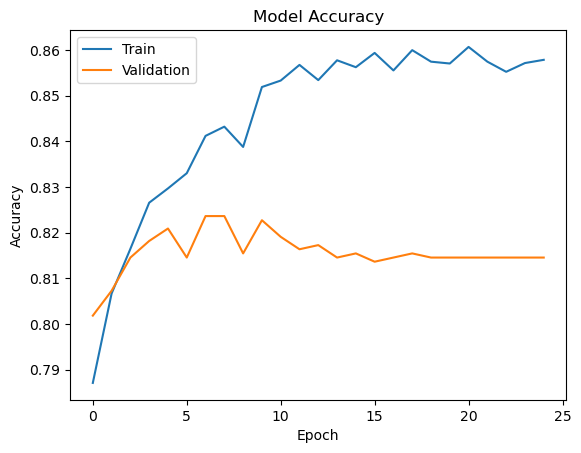

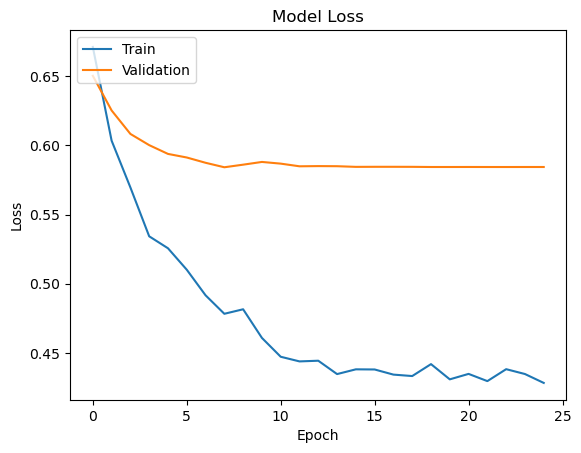

In [24]:
# plot the training and validation accuracy over epochs
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# plot the training and validation loss over epochs
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Note: The 6 Layered CNN architecture and Results are given in a Separate Jupyter Notebook.